In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [4]:
df.shape

(23880, 17)

In [5]:
df.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [7]:
for column in df.columns:
    print(column,df[column].nunique())

customer_id 23880
customer_age 75
job_type 12
marital 3
education 4
default 2
balance 5811
housing_loan 2
personal_loan 2
communication_type 3
day_of_month 31
month 12
last_contact_duration 312
num_contacts_in_campaign 44
num_contacts_prev_campaign 38
prev_campaign_outcome 4
term_deposit_subscribed 2


In [8]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [9]:
df.term_deposit_subscribed.value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

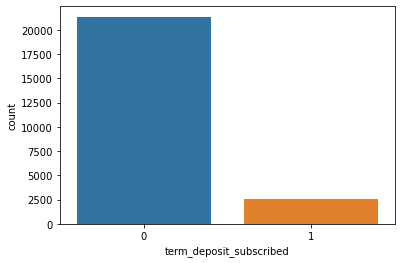

In [10]:
sns.countplot(x='term_deposit_subscribed',data=df)

In [11]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 

customer_id
['id_32289' 'id_40992' 'id_41178' ... 'id_44679' 'id_4841' 'id_1723']
job_type
['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
marital
['married' 'single' 'divorced' nan]
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing_loan
['no' 'yes']
personal_loan
['yes' 'no' nan]
communication_type
['cellular' 'unknown' 'telephone']
month
['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
prev_campaign_outcome
['other' 'unknown' 'failure' 'success']


<AxesSubplot:xlabel='count', ylabel='job_type'>

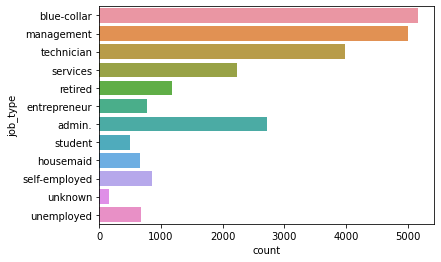

In [12]:
sns.countplot(y='job_type',data=df)

<AxesSubplot:xlabel='count', ylabel='marital'>

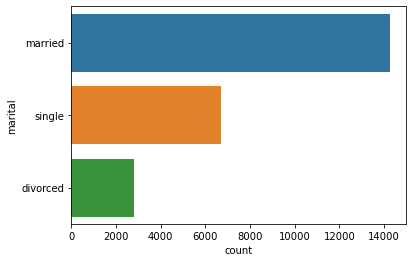

In [13]:
sns.countplot(y='marital',data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

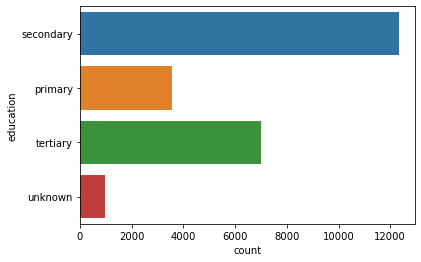

In [14]:
sns.countplot(y='education',data=df)

<AxesSubplot:xlabel='count', ylabel='default'>

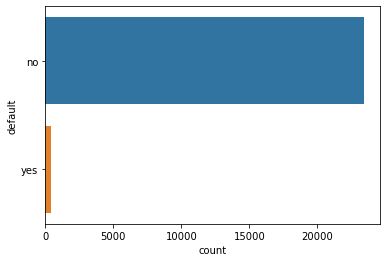

In [15]:
sns.countplot(y='default',data=df) #unimportant

<AxesSubplot:xlabel='count', ylabel='housing_loan'>

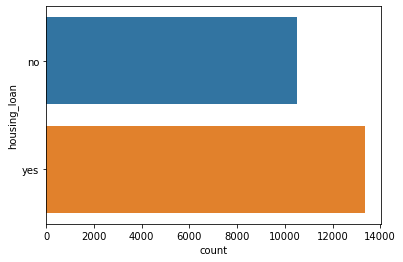

In [16]:
sns.countplot(y='housing_loan',data=df) #balance in the feature

<AxesSubplot:xlabel='count', ylabel='personal_loan'>

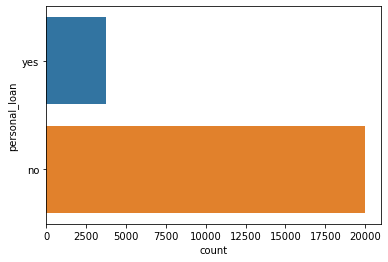

In [17]:
sns.countplot(y='personal_loan',data=df) #with no loans don't opt for term deposits

<AxesSubplot:xlabel='count', ylabel='communication_type'>

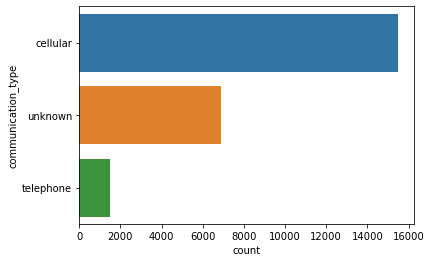

In [18]:
sns.countplot(y='communication_type',data=df)

<AxesSubplot:xlabel='count', ylabel='month'>

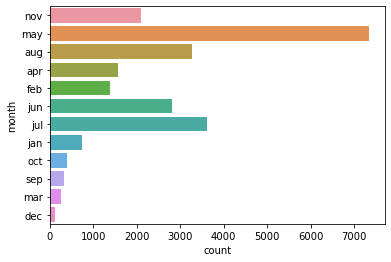

In [19]:
sns.countplot(y='month',data=df)

<AxesSubplot:xlabel='count', ylabel='prev_campaign_outcome'>

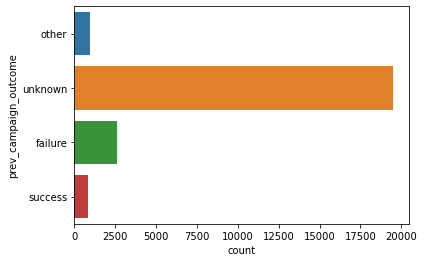

In [20]:
sns.countplot(y='prev_campaign_outcome',data=df)

In [21]:
df.customer_age=df.customer_age.fillna(34)
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0


In [22]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [23]:
df = df.replace('unknown', np.NaN)

In [24]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                        154
marital                         107
education                       986
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6892
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         96
num_contacts_prev_campaign        0
prev_campaign_outcome         19513
term_deposit_subscribed           0
dtype: int64

In [25]:
df = df[df.job_type.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                         107
education                       915
default                           0
balance                         277
housing_loan                      0
personal_loan                   113
communication_type             6831
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19377
term_deposit_subscribed           0
dtype: int64

In [26]:
df = df[df.marital.notna()]
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                       913
default                           0
balance                         273
housing_loan                      0
personal_loan                   113
communication_type             6795
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [27]:
def randomCatFill(df, colName):
    perm = np.random.permutation(df[colName])
    
    perm = perm[~pd.isnull(perm)]
    
    end = len(perm)
    df[colName] = df[colName].apply(lambda x: perm[np.random.randint(end)] if pd.isnull(x) else x)

In [28]:
randomCatFill(df, 'education')
randomCatFill(df, 'personal_loan')
randomCatFill(df, 'communication_type')

In [29]:
df.isnull().sum()

customer_id                       0
customer_age                      0
job_type                          0
marital                           0
education                         0
default                           0
balance                         273
housing_loan                      0
personal_loan                     0
communication_type                0
day_of_month                      0
month                             0
last_contact_duration             0
num_contacts_in_campaign         95
num_contacts_prev_campaign        0
prev_campaign_outcome         19294
term_deposit_subscribed           0
dtype: int64

In [30]:
df.prev_campaign_outcome = df.prev_campaign_outcome.fillna("nonexistent")

In [31]:
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       95
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [32]:
df = df[df.num_contacts_in_campaign.notna()]
df.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                         0
education                       0
default                         0
balance                       273
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign        0
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [33]:
df.balance.mode()

0    3.0
dtype: float64

In [34]:
current_balance = df.pivot_table(values='balance', columns='job_type', aggfunc=(lambda x: x.mean()[0]))

In [35]:
current_balance

job_type,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
balance,1125.321563,1102.675761,1512.725955,1442.75,1794.717285,2000.95986,1677.40311,965.30371,1326.635628,1227.701282,1419.781297


In [36]:
miss_values = df['balance'].isnull()   

In [37]:
miss_values

0        False
1        False
2        False
3        False
4        False
         ...  
23875    False
23876    False
23877    False
23878    False
23879    False
Name: balance, Length: 23524, dtype: bool

In [38]:
df.loc[miss_values, 'balance'] = df.loc[miss_values,'job_type'].apply(lambda x: current_balance[x])

In [39]:
df.isnull().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [40]:
df.balance

0         934.0
1        1352.0
2         495.0
3         650.0
4         265.0
          ...  
23875     567.0
23876    1072.0
23877     242.0
23878    2699.0
23879    1045.0
Name: balance, Length: 23524, dtype: float64

### Corelation Matrix

<AxesSubplot:>

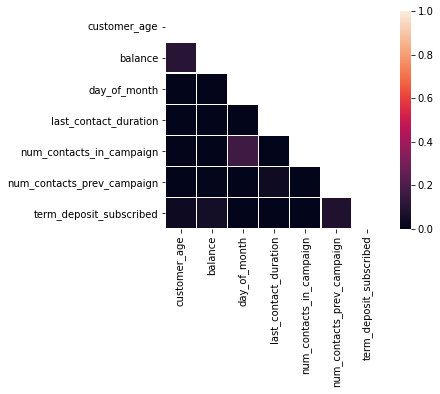

In [41]:
# get the correlation matrix
corr = df.corr()

# create a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the correlation heatmap
sns.heatmap(corr, vmin=0, vmax=1, square=True,
           linewidths=.5, mask=mask, fmt='.2f')

In [42]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,nonexistent,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,nonexistent,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,cellular,26,may,880,1.0,0,nonexistent,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,nonexistent,0


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['n_job']=le.fit_transform(df['job_type'])
df['n_marital']=le.fit_transform(df['marital'])
df['n_education']=le.fit_transform(df['education'])
df['n_loan']=le.fit_transform(df['personal_loan'])
df['n_contact']=le.fit_transform(df['communication_type'])
df['n_month']=le.fit_transform(df['month'])
df['n_poutcome']=le.fit_transform(df['prev_campaign_outcome'])

In [44]:
df

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,...,1,other,0,1,1,1,1,0,9,2
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,...,0,nonexistent,0,1,1,0,0,0,8,1
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,...,0,nonexistent,1,1,1,0,0,0,1,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,no,cellular,...,0,nonexistent,0,4,1,2,0,0,8,1
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,...,0,nonexistent,0,9,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,...,3,other,0,0,1,1,0,0,3,2
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,cellular,...,0,nonexistent,0,4,1,2,0,0,6,1
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,cellular,...,0,nonexistent,0,10,1,0,0,0,8,1
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,...,0,nonexistent,0,7,1,1,0,0,1,1


In [45]:
df.drop(['job_type','month','marital','education','default','housing_loan','personal_loan','communication_type',
         'prev_campaign_outcome','customer_id'],axis=1,inplace=True)

In [46]:
df

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [47]:
for col in df.select_dtypes(include='int64').columns:
  print(col)
  print(df[col].unique()) 

day_of_month
[18 13 26 19  7 16  6 17  5 22  2 20  3  4 29 30 14  9 27 31 23 12 11  8
 15 25  1 28 21 10 24]
last_contact_duration
[ 704  893  796  880  795  807  899  920  989  857  705  870  869  823
  843  794  842  841  997  933  996  888  892  751  816  774  858  916
  879  814  730  894  895  898  992  891  990  820  901  863  702  792
  801  834  752  951  788  782  991  877  837  829  876  866  817  740
  900  871  670  677  785  824  675  855  808  902  889  913  872  859
  761  809  883  830  986  706  887  998  919  936  827  789  929  873
  897  701  885  825  793  878  890  906  803  815  703  886  802  853
  828  963  728  800  950  836  806  874  754  909  838  850  733  864
  969  786  923  810  993  922  958  787  881  835  984  662  822  968
  856  965  812  762  724  710  833  725  711  935  735 1013  668  783
  882  678  861  921  695  959  985  821  739  716  758  928  831  778
  952  849  797  847  720  726  685  768  927  731  804  860  937  938
  930  718  745  

In [48]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,40.225047,1360.878599,15.800119,854.916638,2.770405,0.585402,0.106232,4.294253,1.164853,1.149762,0.159114,0.087145,5.538471,0.997024
std,10.660200,3005.177283,8.319657,74.608798,3.133031,2.637983,0.308141,3.235169,0.611246,0.662789,0.365790,0.282053,3.012283,0.532887
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,74.000000,8.000000,809.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000
50%,38.000000,455.500000,16.000000,871.000000,2.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000
75%,48.000000,1413.250000,21.000000,897.000000,3.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000,10.000000,2.000000,2.000000,1.000000,1.000000,11.000000,3.000000


### Outlier Detection

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='n_poutcome'>

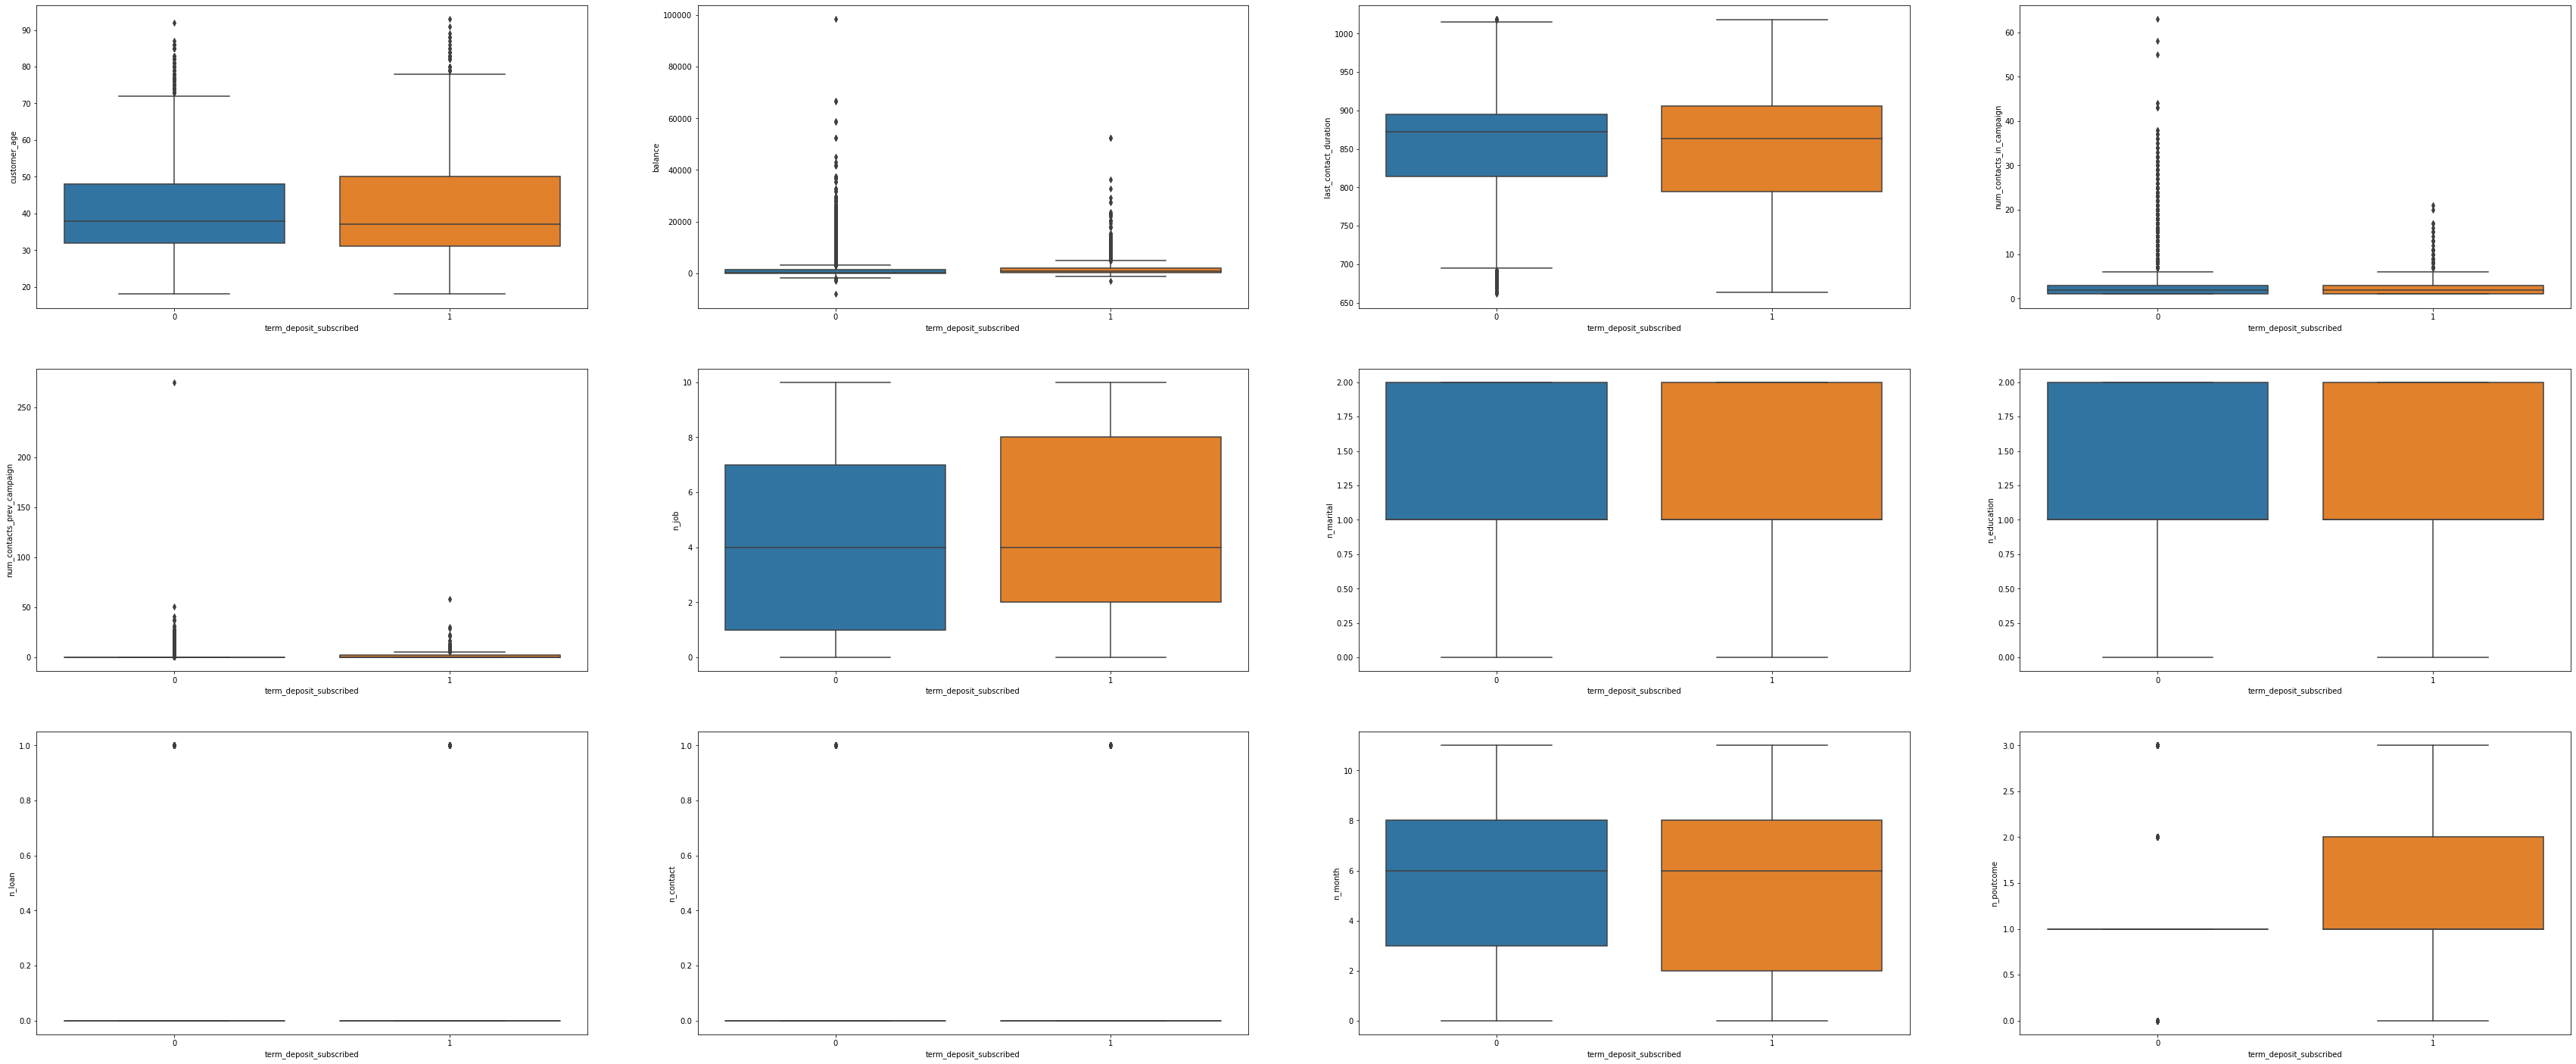

In [49]:
figure, axis = plt.subplots(3, 4, figsize = (60,25))
sns.boxplot(x='term_deposit_subscribed',y='customer_age',data=df,ax=axis[0,0])
sns.boxplot(x='term_deposit_subscribed',y='balance',data=df,ax=axis[0,1])
sns.boxplot(x='term_deposit_subscribed',y='last_contact_duration',data=df,ax=axis[0,2])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_in_campaign',data=df,ax=axis[0,3])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_prev_campaign',data=df,ax=axis[1,0])
sns.boxplot(x='term_deposit_subscribed',y='n_job',data=df,ax=axis[1,1])
sns.boxplot(x='term_deposit_subscribed',y='n_marital',data=df,ax=axis[1,2])
sns.boxplot(x='term_deposit_subscribed',y='n_education',data=df,ax=axis[1,3])
sns.boxplot(x='term_deposit_subscribed',y='n_loan',data=df,ax=axis[2,0])
sns.boxplot(x='term_deposit_subscribed',y='n_contact',data=df,ax=axis[2,1])
sns.boxplot(x='term_deposit_subscribed',y='n_month',data=df,ax=axis[2,2])
sns.boxplot(x='term_deposit_subscribed',y='n_poutcome',data=df,ax=axis[2,3])

In [50]:
outcome_zero=df[df['term_deposit_subscribed'] == 0]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


### Outliers Removal

In [51]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

In [52]:
LR,UR=Outdet(outcome_zero.customer_age)
print(LR,UR)

8.0 72.0


In [53]:
outcome_zero=outcome_zero[(outcome_zero['customer_age'] > LR)  &  (outcome_zero['customer_age'] < UR)]

In [54]:
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [55]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)

-1852.5 3247.5


In [56]:
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [57]:
LR,UR=Outdet(outcome_zero.last_contact_duration)
print(LR,UR)

692.0 1020.0


In [58]:
outcome_zero=outcome_zero[(outcome_zero['last_contact_duration']>LR) & (outcome_zero['last_contact_duration']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2
23876,51.0,1072.0,20,855,7.0,0,0,4,1,2,0,0,6,1
23877,41.0,242.0,23,883,2.0,0,0,10,1,0,0,0,8,1
23878,48.0,2699.0,11,803,6.0,0,0,7,1,1,0,0,1,1


In [59]:
LR,UR=Outdet(outcome_zero.num_contacts_in_campaign)
print(LR,UR)

-2.0 6.0


In [60]:
outcome_zero=outcome_zero[(outcome_zero['num_contacts_in_campaign']>LR) & (outcome_zero['num_contacts_in_campaign']< UR)]
outcome_zero

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [61]:
outcome_one=df[df['term_deposit_subscribed'] == 1]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23831,32.0,5612.0,28,817,3.0,0,1,6,1,1,0,0,5,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [62]:
LR,UR=Outdet(outcome_one.customer_age)
print(LR,UR)

2.5 78.5


In [63]:
outcome_one=outcome_one[(outcome_one['customer_age'] > LR)  &  (outcome_one['customer_age'] < UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23831,32.0,5612.0,28,817,3.0,0,1,6,1,1,0,0,5,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [64]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)

-2688.25 5063.75


In [65]:
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [66]:
LR,UR=Outdet(outcome_one.last_contact_duration)
print(LR,UR)

631.0 1071.0


In [67]:
outcome_one=outcome_one[(outcome_one['last_contact_duration']>LR) & (outcome_one['last_contact_duration']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [68]:
LR,UR=Outdet(outcome_one.num_contacts_in_campaign)
print(LR,UR)

-2.0 6.0


In [69]:
outcome_one=outcome_one[(outcome_one['num_contacts_in_campaign']>LR) & (outcome_one['num_contacts_in_campaign']< UR)]
outcome_one

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [70]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-2018.625 3844.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [71]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1308.125 2278.875


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [72]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1728.25 3301.75


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [73]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1549.25 2970.75


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [74]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1106.5 1913.5


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [75]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1008.5 1739.5


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [76]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1495.625 2847.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [77]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-965.0 1659.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [78]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1443.0 2757.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [79]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-944.625 1622.375


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [80]:
LR,UR=Outdet(outcome_zero.customer_age)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['customer_age']>LR) & (outcome_zero['customer_age']< UR)]
outcome_zero

11.0 67.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23870,35.0,662.0,19,703,1.0,0,0,4,2,2,0,0,9,1
23872,45.0,92.0,17,919,2.0,1,0,7,0,0,0,0,0,0
23873,40.0,2.0,2,993,4.0,0,0,2,1,2,1,0,3,1
23875,58.0,567.0,2,993,2.0,3,0,0,1,1,0,0,3,2


In [81]:
LR,UR=Outdet(outcome_one.customer_age)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['customer_age']>LR) & (outcome_one['customer_age']< UR)]
outcome_one

3.0 75.0


,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
2,57.0,495.0,18,796,4.0,0,1,1,1,0,0,0,1,1
7,18.0,420.0,16,920,1.0,0,1,1,2,1,0,0,0,1
16,70.0,479.0,2,843,2.0,0,1,5,0,0,0,0,5,1
19,28.0,340.0,4,841,3.0,0,1,7,2,0,0,0,5,1
26,54.0,1459.0,2,751,2.0,1,1,4,1,2,0,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [82]:
df_1=pd.concat([outcome_zero,outcome_one],axis=0)
df_1

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


In [83]:
df_1.term_deposit_subscribed.value_counts()

0    14632
1     1884
Name: term_deposit_subscribed, dtype: int64

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='n_poutcome'>

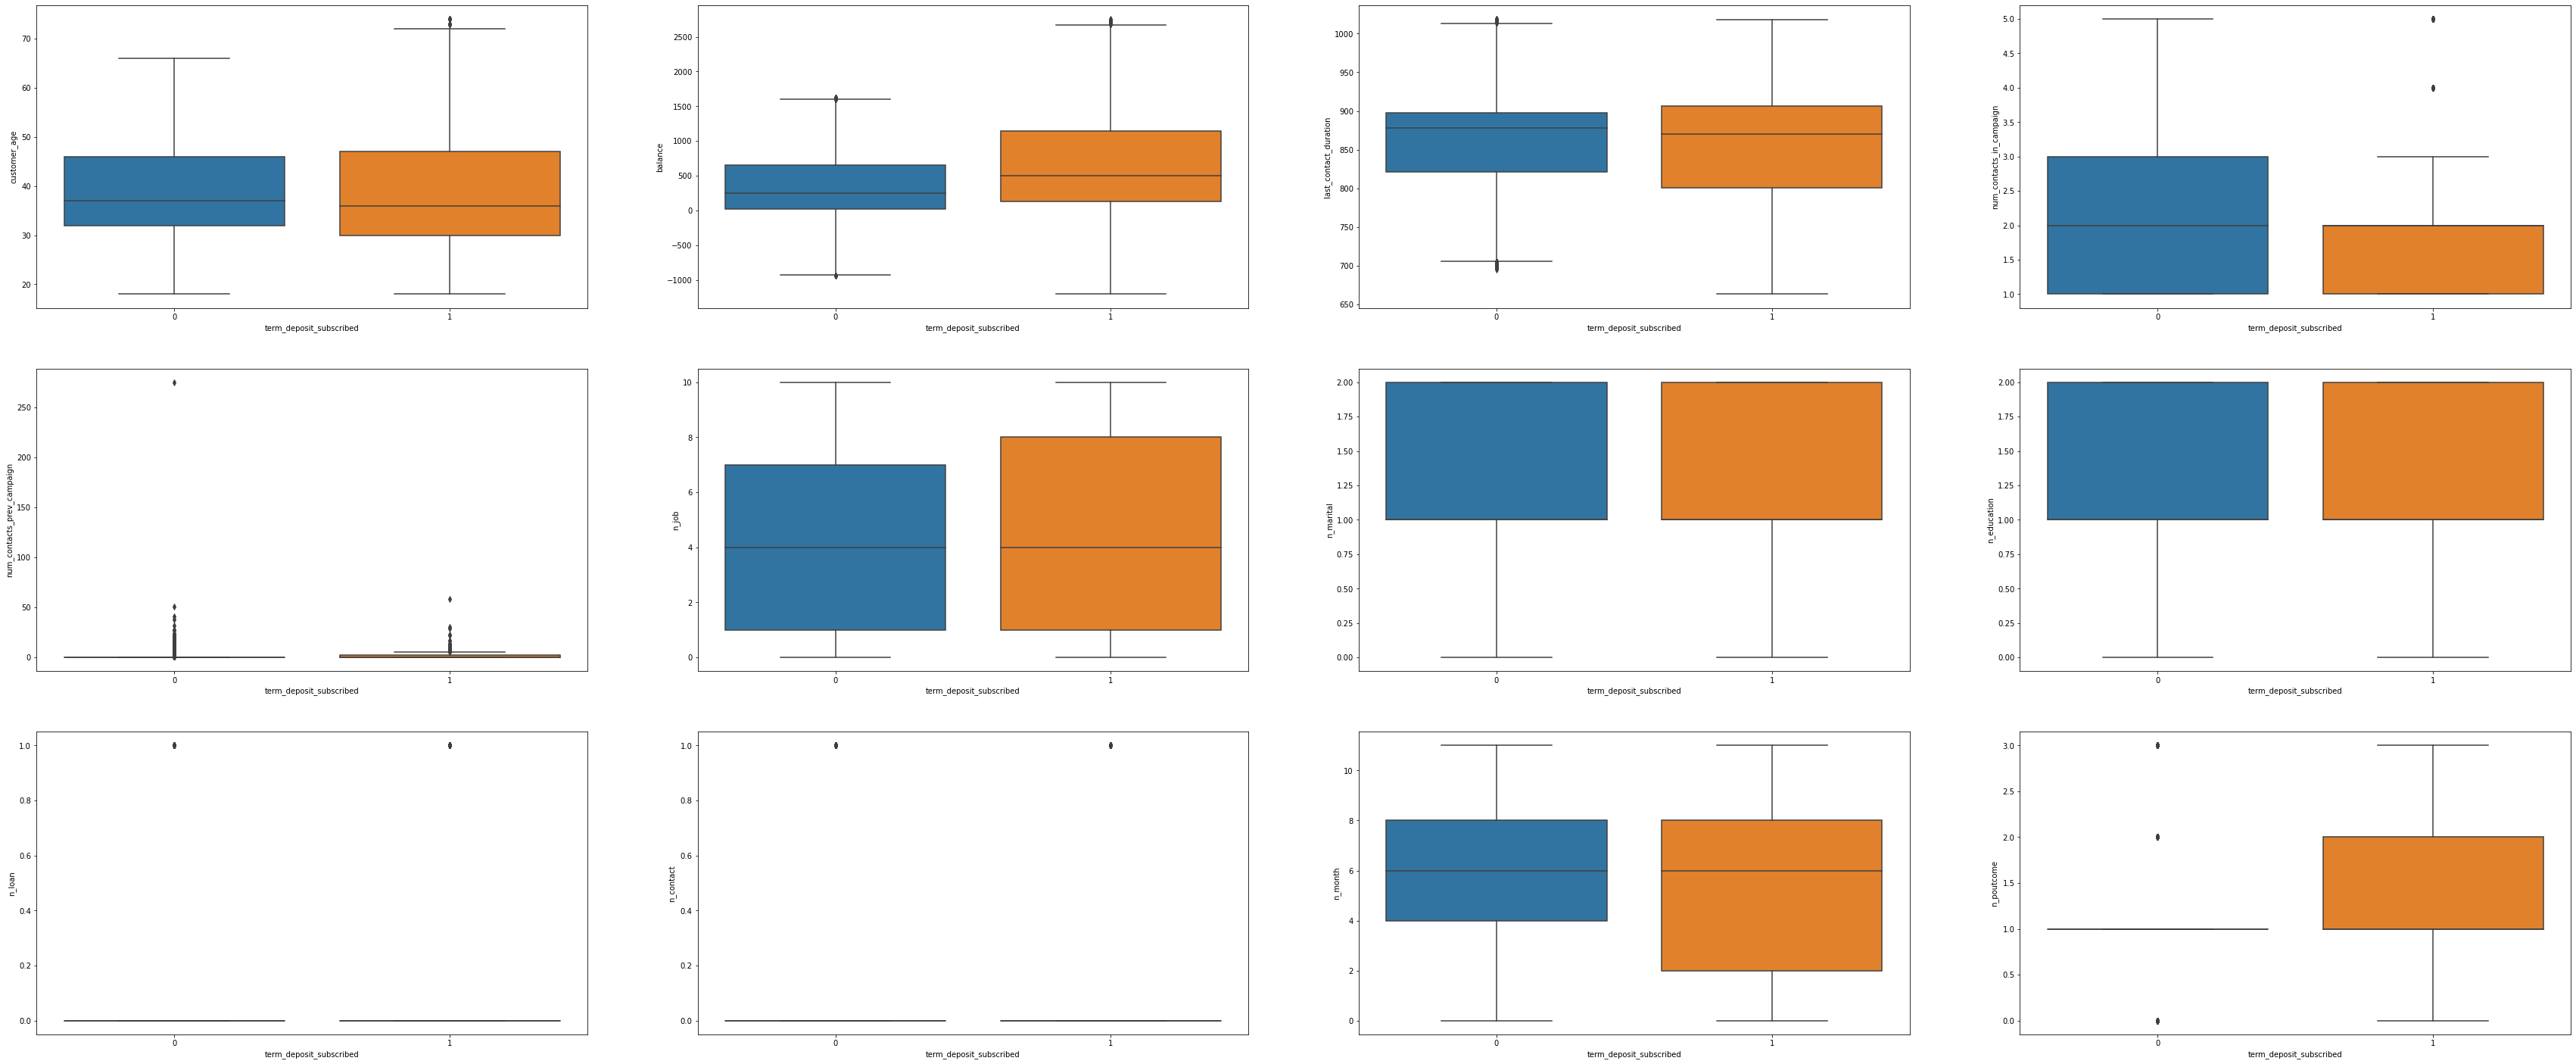

In [84]:
figure, axis = plt.subplots(3, 4, figsize = (60,25))
sns.boxplot(x='term_deposit_subscribed',y='customer_age',data=df_1,ax=axis[0,0])
sns.boxplot(x='term_deposit_subscribed',y='balance',data=df_1,ax=axis[0,1])
sns.boxplot(x='term_deposit_subscribed',y='last_contact_duration',data=df_1,ax=axis[0,2])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_in_campaign',data=df_1,ax=axis[0,3])
sns.boxplot(x='term_deposit_subscribed',y='num_contacts_prev_campaign',data=df_1,ax=axis[1,0])
sns.boxplot(x='term_deposit_subscribed',y='n_job',data=df_1,ax=axis[1,1])
sns.boxplot(x='term_deposit_subscribed',y='n_marital',data=df_1,ax=axis[1,2])
sns.boxplot(x='term_deposit_subscribed',y='n_education',data=df_1,ax=axis[1,3])
sns.boxplot(x='term_deposit_subscribed',y='n_loan',data=df_1,ax=axis[2,0])
sns.boxplot(x='term_deposit_subscribed',y='n_contact',data=df_1,ax=axis[2,1])
sns.boxplot(x='term_deposit_subscribed',y='n_month',data=df_1,ax=axis[2,2])
sns.boxplot(x='term_deposit_subscribed',y='n_poutcome',data=df_1,ax=axis[2,3])

<AxesSubplot:>

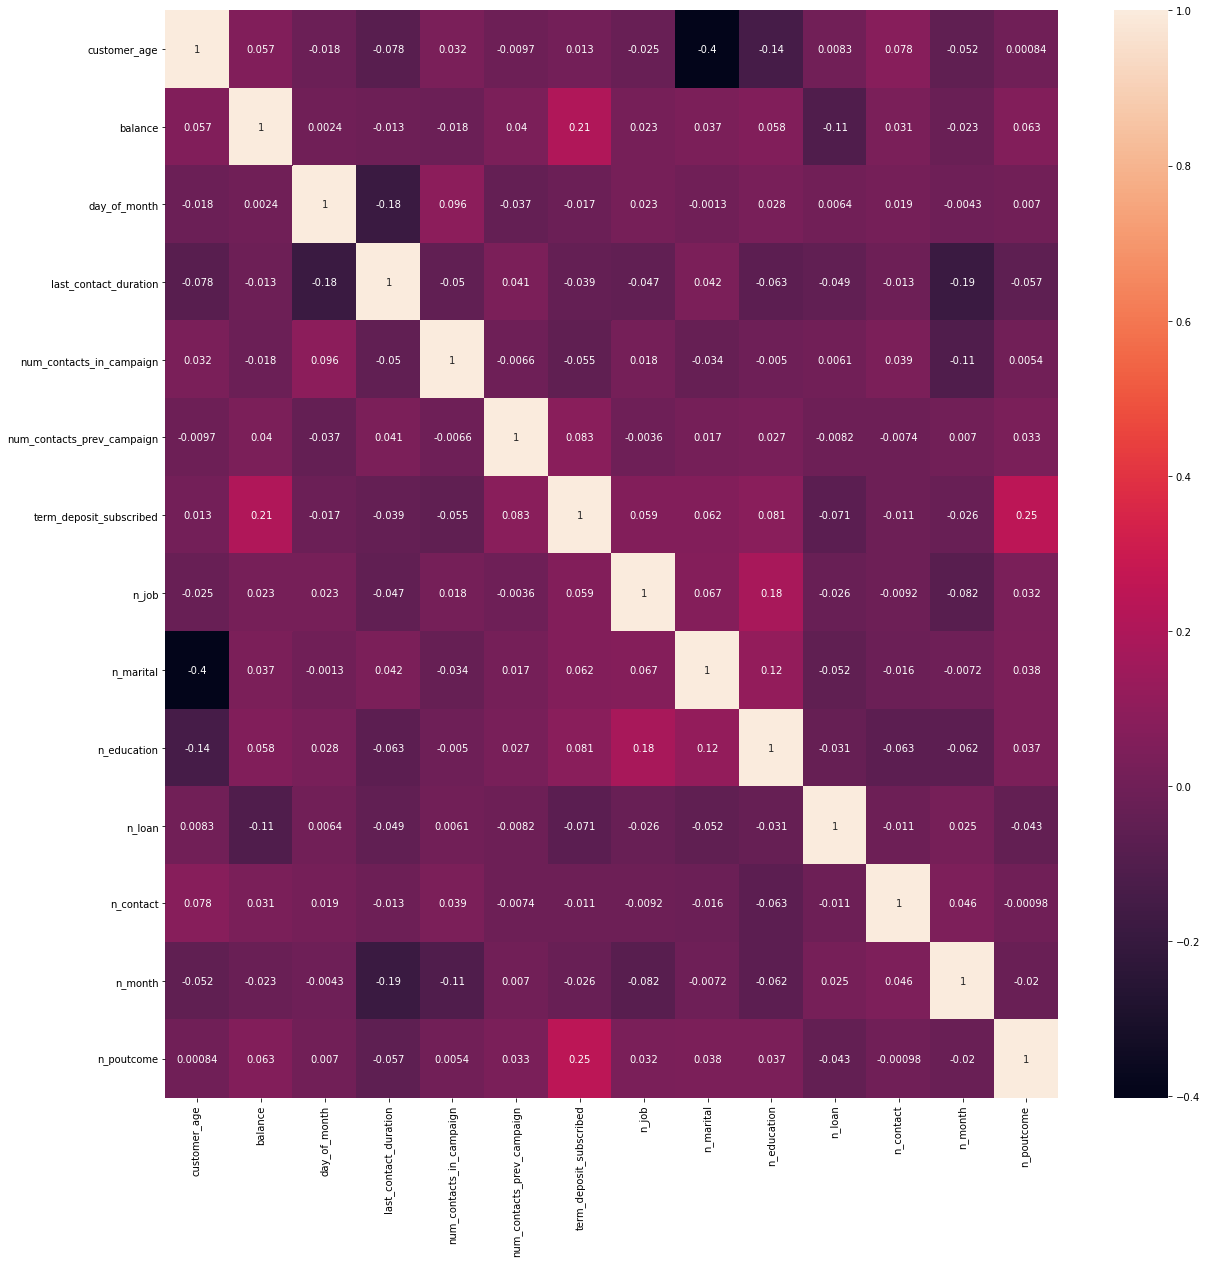

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(df_1.corr(),annot =True)

In [86]:
df_1

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome
0,34.0,934.0,18,704,2.0,1,0,1,1,1,1,0,9,2
1,41.0,1352.0,13,893,2.0,0,0,1,1,0,0,0,8,1
3,37.0,650.0,26,880,1.0,0,0,4,1,2,0,0,8,1
4,29.0,265.0,19,795,2.0,0,0,9,1,1,0,0,1,1
5,50.0,407.0,7,807,2.0,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23811,41.0,701.0,20,702,2.0,2,1,1,1,1,1,0,9,2
23823,33.0,542.0,16,920,1.0,4,1,9,1,1,0,0,0,0
23829,47.0,127.0,3,872,2.0,0,1,1,0,0,0,1,6,1
23842,27.0,614.0,18,888,1.0,0,1,9,2,2,0,0,8,1


## Undersampling

In [87]:
count_class_0, count_class_1 = df_1.term_deposit_subscribed.value_counts()

# Divide by class
df_class_0 = df_1[df_1['term_deposit_subscribed'] == 0]
df_class_1 = df_1[df_1['term_deposit_subscribed'] == 1]

In [88]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.term_deposit_subscribed.value_counts())

Random under-sampling:
1    1884
0    1884
Name: term_deposit_subscribed, dtype: int64


In [89]:
x=df_test_under.drop(['term_deposit_subscribed','day_of_month'],axis=1).values
print(x)
y=df_test_under['term_deposit_subscribed'].values
print(y)

[[ 30. 553. 899. ...   0.   8.   0.]
 [ 31. 214. 702. ...   0.   9.   1.]
 [ 54.  13. 928. ...   0.   0.   1.]
 ...
 [ 47. 127. 872. ...   1.   6.   1.]
 [ 27. 614. 888. ...   0.   8.   1.]
 [ 51. 298. 891. ...   0.   8.   0.]]
[0 0 0 ... 1 1 1]


In [90]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,stratify=y)

## Scaling of data

In [91]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
x_train_std_features=std_model.fit_transform(x_train)
x_test_std_features=std_model.transform(x_test)

In [92]:
x_train_std_features.shape

(3014, 12)

In [93]:
x_test_std_features.shape

(754, 12)

## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
modelreg=LogisticRegression()
modelreg.fit(x_train_std_features,y_train)

LogisticRegression()

In [95]:
ypred=modelreg.predict(x_test_std_features)
ypred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [96]:
modelreg.score(x_test_std_features,y_test)

0.6405835543766578

In [97]:
x_test_std_features.shape

(754, 12)

In [98]:
y_test.shape

(754,)

In [99]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.6405835543766578
Precision: 0.6709677419354839
Recall: 0.5517241379310345


In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
cnf_matrix

array([[275, 102],
       [169, 208]], dtype=int64)

## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train_std_features, y_train)

KNeighborsClassifier()

In [102]:
y_predicted_KNN = KNN_model.predict(x_test_std_features)

In [103]:
KNN_model.score(x_test_std_features,y_test)

0.629973474801061

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.629973474801061
Precision: 0.6560509554140127
Recall: 0.5464190981432361


In [105]:
## Naive Byes

from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train_std_features, y_train)

GaussianNB()

In [106]:
y_predicted_naive = naive_bayes_model.predict(x_test_std_features)

In [107]:
naive_bayes_model.score(x_test_std_features,y_test)

0.6379310344827587

In [108]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.6379310344827587
Precision: 0.7166666666666667
Recall: 0.4562334217506631


In [109]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(x_train_std_features, y_train)

y_predicted_deseciontree = deseciontree_model.predict(x_test_std_features)
deseciontree_model.score(x_test_std_features,y_test)

0.6419098143236074

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.6419098143236074
Precision: 0.6354430379746835
Recall: 0.6657824933687002


In [111]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(x_train_std_features, y_train)

y_predicted_randomforest = randomforest_model.predict(x_test_std_features)
randomforest_model.score(x_test_std_features,y_test)

0.6777188328912467

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.6777188328912467
Precision: 0.710691823899371
Recall: 0.5994694960212201


In [113]:
from sklearn.svm import SVC
SVM_model_rbf=SVC(kernel='rbf')
SVM_model_rbf.fit(x_train_std_features,y_train)

y_predicted_SVM_rbf = SVM_model_rbf.predict(x_test_std_features)
SVM_model_rbf.score(x_test_std_features,y_test)

0.6631299734748011

In [114]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_rbf))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_rbf))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_rbf))

Accuracy: 0.6631299734748011
Precision: 0.7016393442622951
Recall: 0.5676392572944297


In [115]:
from sklearn.svm import SVC
SVM_model_linear=SVC(kernel='linear')
SVM_model_linear.fit(x_train_std_features,y_train)

y_predicted_SVM_linear = SVM_model_linear.predict(x_test_std_features)
SVM_model_linear.score(x_test_std_features,y_test)

0.6352785145888594

In [116]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_linear))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_linear))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_linear))

Accuracy: 0.6352785145888594
Precision: 0.7007874015748031
Recall: 0.47214854111405835


In [117]:
from sklearn.ensemble import GradientBoostingClassifier
GradientB_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)

GradientB_model.fit(x_train_std_features,y_train)
y_predicted_GradientB = GradientB_model.predict(x_test_std_features)
GradientB_model.score(x_test_std_features,y_test)

0.6724137931034483

In [118]:
from sklearn.model_selection import cross_val_score
accuracygb = cross_val_score(GradientB_model,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracygb)

[0.6986755  0.71854305 0.75827815 0.67549669 0.70431894 0.68438538
 0.76744186 0.70099668 0.6910299  0.68438538]


In [119]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_GradientB))
print("Precision:",metrics.precision_score(y_test,y_predicted_GradientB))
print("Recall:",metrics.recall_score(y_test, y_predicted_GradientB))

Accuracy: 0.6724137931034483
Precision: 0.6923076923076923
Recall: 0.6206896551724138


In [120]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost_model=AdaBoostClassifier(n_estimators=100)
Adaboost_model.fit(x_train_std_features,y_train)
y_predicted_Adaboost = Adaboost_model.predict(x_test_std_features)
Adaboost_model.score(x_test_std_features,y_test)

0.7214854111405835

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_Adaboost))
print("Precision:",metrics.precision_score(y_test,y_predicted_Adaboost))
print("Recall:",metrics.recall_score(y_test, y_predicted_Adaboost))

Accuracy: 0.7214854111405835
Precision: 0.8036363636363636
Recall: 0.5862068965517241


In [122]:
accuracyada = cross_val_score(Adaboost_model,x_train_std_features,y_train, scoring='accuracy', cv = 10)
print(accuracyada)

[0.7384106  0.73509934 0.77483444 0.70198675 0.75083056 0.74086379
 0.76079734 0.74418605 0.76079734 0.73089701]


In [123]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_Adaboost = classification_report(y_test,y_predicted_Adaboost)
print(report_Adaboost)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       377
           1       0.80      0.59      0.68       377

    accuracy                           0.72       754
   macro avg       0.74      0.72      0.72       754
weighted avg       0.74      0.72      0.72       754



In [124]:
roc_auc_score(y_test,y_predicted_Adaboost)

0.7214854111405835

In [125]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted_Adaboost)
auc = auc(fpr,tpr)

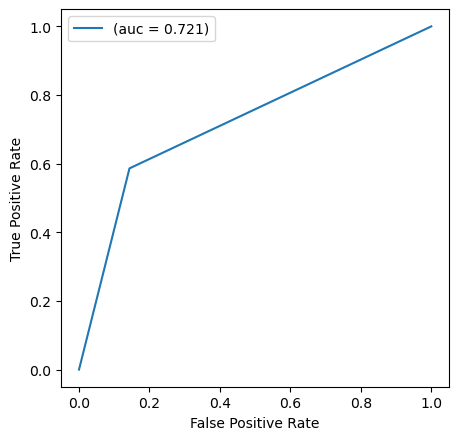

In [126]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()